In [1]:
import xgboost as xgb
import lightgbm as lgb

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree


In [3]:
df = load_diabetes()

In [15]:
X = df.data
y = df.target
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label= y_valid)

In [17]:
params = {'max_depth' : 3 , 'eta': 0.01, 'objective': 'reg:squarederror'}

In [18]:
num_round = 1000
evallist=[(dvalid, 'eval'), (dtrain, 'train')]

In [19]:
evals_result = {}
bst = xgb.train(params,dtrain, num_round,evallist, early_stopping_rounds= 10, evals_result =evals_result)



[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[6]	eval-rmse:71.25887	train-rmse:75.33864
[7]	eval-rmse:70.99426	train-rmse:74.97820
[8]	eval-rmse:70.73045	train-rmse:74.62795
[9]	eval-rmse:70.49050	train-rmse:74.28277
[10]	eval-rmse:70.24539	train-rmse:73.94244
[11]	eval-rmse:70.00295	train-rmse:73.60703
[12]	eval-rmse:69.76562	train-rmse:73.27638
[13]	eval-rmse:69.52100	train-rmse:72.94524
[14]	eval-rmse:69.27481	train-rmse:72.62546
[15]	eval-rmse:69.00998	train-rmse:72.30320
[16]	eval-rmse:68.78755	train-rmse:71.98529
[17]	eval-rmse:68.55737	train-rmse:71.66870
[18]	eval-rmse:68.30442	train-rmse:71.35914
[19]	eval-rmse:68.10443	train-rmse:71.05081
[20]	eval-rmse:67.88706	train-rmse:70.74940
[21]	eval-rmse:67.65367	train-rmse:70.45212
[22]	eval-rmse:67.42270	train-rmse:70.1555

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[53]	eval-rmse:61.73220	train-rmse:62.59064
[54]	eval-rmse:61.58766	train-rmse:62.38900
[55]	eval-rmse:61.45209	train-rmse:62.19042
[56]	eval-rmse:61.31234	train-rmse:61.99566
[57]	eval-rmse:61.18817	train-rmse:61.80953
[58]	eval-rmse:61.05453	train-rmse:61.61868
[59]	eval-rmse:60.92338	train-rmse:61.43170
[60]	eval-rmse:60.80703	train-rmse:61.24566
[61]	eval-rmse:60.69047	train-rmse:61.06918
[62]	eval-rmse:60.54518	train-rmse:60.88108
[63]	eval-rmse:60.41348	train-rmse:60.70923
[64]	eval-rmse:60.29208	train-rmse:60.53297
[65]	eval-rmse:60.17352	train-rmse:60.36000
[66]	eval-rmse:60.06458	train-rmse:60.19499
[67]	eval-rmse:59.94155	train-rmse:60.02462
[68]	eval-rmse:59.82897	train-rmse:59.85836
[69]	eval-rmse:59.72663	train-rmse:59.70009
[70]	eval-rmse:59.59725	train-rmse:59.52974
[71]	eval-rmse:59.48682	train-rmse:59.36779
[72]	eval-rmse:59.36886	train-rmse:59.20731
[73]	eval-rmse:59.26992	train-rmse:59.05215
[74]	eval-rmse:59.17021	train-rmse:58.89214
[75]	eval-rmse:59.07138	train-rm

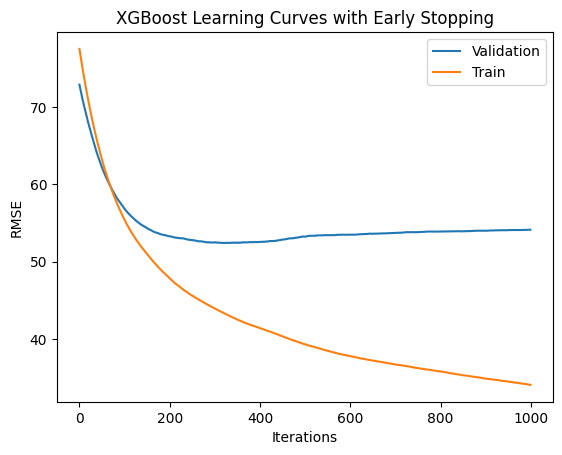

In [20]:
# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Early Stopping')
plt.show()

In [21]:
evals_result.keys()

dict_keys(['eval', 'train'])

In [25]:
results_df = pd.DataFrame([evals_result['eval']['rmse'], evals_result['train']['rmse']]).T


In [26]:
results_df

,0,1
0,72.930889,77.563037
1,72.643776,77.180398
2,72.361093,76.803274
3,72.082784,76.431603
4,71.808797,76.065323
...,...,...
995,54.132885,34.076937
996,54.136143,34.070693
997,54.140817,34.065936
998,54.142821,34.038913


In [27]:
results_df['diff']= results_df[0] - results_df [1]

In [33]:
results_df[results_df['diff']<0.01]

,0,1,diff
0,72.930889,77.563037,-4.632147
1,72.643776,77.180398,-4.536622
2,72.361093,76.803274,-4.442181
3,72.082784,76.431603,-4.348818
4,71.808797,76.065323,-4.256526
...,...,...,...
64,60.292083,60.532969,-0.240886
65,60.173519,60.360002,-0.186483
66,60.064582,60.194993,-0.130410
67,59.941553,60.024619,-0.083066


In [37]:
bst.best_ntree_limit = 67
predictions=bst.predict(dvalid)
predictions

array([159.18893 , 206.27591 , 175.22429 , 295.9157  , 125.61823 ,
       128.06154 , 257.15338 , 211.338   , 149.00725 , 154.41249 ,
       104.102036, 196.0869  ,  91.59793 , 239.47511 , 118.52005 ,
       111.4021  , 229.35774 , 256.7412  , 185.72925 , 235.24536 ,
       186.84236 ,  96.88423 ,  70.414986, 199.52876 , 152.07    ,
       187.21767 , 204.85905 , 196.00319 ,  72.606544, 108.55862 ,
       180.78674 , 118.76349 , 146.50636 , 183.84616 , 149.25348 ,
       187.11473 , 112.96919 , 114.76101 , 184.28674 ,  68.52865 ,
        67.98585 ,  83.91956 , 174.2202  , 185.96986 , 180.46988 ,
        79.47412 , 100.26168 , 112.16302 ,  73.11136 , 164.4933  ,
       124.60371 ,  82.27981 , 140.3247  , 100.12516 , 195.36021 ,
       146.1376  ,  96.57848 , 232.90302 ,  89.81601 ,  89.82054 ,
       174.07098 , 185.5151  , 127.16104 ,  85.30461 , 122.92981 ,
       234.15456 , 162.96346 , 181.43661 , 151.00249 , 112.90678 ,
       161.7822  , 192.78462 , 239.39641 ,  97.16356 ,  87.351

In [41]:
best_iteration = bst.best_iteration
print({f'Best Iteration' : best_iteration})

{'Best Iteration': 999}
